## Preprocessing of tweets
- Removing all URLs (“https://t.co/hSizQPxVFy”) and mentions (“@CardiffCityFC”) DONE

- Removing emoticons not analyzable as provided by the Twitter API in R (“<U+009F>”) DONE

- Removing punctuation characters and digits DONE

- Removing tabs, line breaks and unnecessary spaces DONE 

- Removing any non-ascii character DONE

- Changing text to lower case DONE

- Replacing contractions with full forms (“wouldn’t” → “would not”)

- Replacing acronyms with full forms (“omg” → “oh my god”)
    - pychant? 
    
    
- Correcting and doubling intentionally misspelled words that express some sort of intensification
(“niiiiiiiiiiiiiiiice” → “nice nice”)

Have tweets with bizzare encoding for I think punctuation and emojis

Example: 
Tweet Collected:
"b'1hr til kick off. Let\\xe2\\x80\\x99s Go Niners!! #fttb \\xe2\\x9d\\xa4\\xef\\xb8\\x8f\\xf0\\x9f\\x92\\x9b'"

Real Tweet:
1hr til kick off. Let’s Go Niners!! #fttb ❤️💛

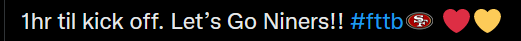  
( also has the SF logo in it )

Would like to keep emojis but might not be possible

In [1]:
import re
from nltk.tokenize import TweetTokenizer
import pandas as pd
from ast import literal_eval

In [2]:

def get_tweets(team, wk):
    df = pd.read_csv(
        f'../team_data/wk_{wk}/wk_{wk}_{team}_tweets.csv', 
        converters={"tweet_text":lambda x:literal_eval(x).decode("utf8")}
        )
    return df

In [3]:
df_49ers_12 = get_tweets('49ers', '12')


tweets_49ers_12 = df_49ers_12['tweet_text']
test_tweets = tweets_49ers_12[:5]

In [4]:
test_tweets[0]

'1hr til kick off. Let’s Go Niners!! #fttb ❤️💛'

In [245]:
import  emot

text1 = "Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"

In [243]:
emot_object = emot.core.emot()
emot_object.emoji(text1)

{'value': ['😂', '😎', '😒'],
 'location': [[10, 11], [42, 43], [87, 88]],
 'mean': [':face_with_tears_of_joy:',
  ':smiling_face_with_sunglasses:',
  ':unamused_face:'],
 'flag': True}

In [244]:
import emoji

emoji.demojize(text1)

'Hilarious :face_with_tears_of_joy:. The feeling of making a sale :smiling_face_with_sunglasses:, The feeling of actually fulfilling orders :unamused_face:'

In [235]:


def clean_tweet(tweet):
    print('OG: ', tweet)
    
    if type(tweet) == float:
        return ""
    # lower case
    r = tweet.lower()

    # remove mentions
    r = re.sub("@[A-Za-z0-9_]+","", r)
    
    # remove hashtags
    r = re.sub("#","", r)
    
    # remove urls
    r = re.sub(r'http\S+', '', r)
    
    # remove string literal utf-8 characters
    # r = re.sub('\\\\x[a-z0-9][a-z0-9]', '', r)

    # remove punctuation?
    r = re.sub('[()!?]', ' ', r)
    
    # remove anything in square brackets - not sure why
    r = re.sub('\[.*?\]',' ', r)


    # This is to avoid removing contractions in english
    r = re.sub("'", "", r) 

    # remove 'RT'
    r = re.sub(r'^RT[\s]+', '', r)

    # replace &amp
    # r = re.sub(r'&amp', 'and', r)

    # remove non digits
    r = re.sub("[^a-z]"," ", r)
    
    # remove special characters
    r = re.sub("\[\n]", "", r)

    # split tokens
    # r = r.split()

    # # remove stopwords
    # stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    # r = [w for w in r if not w in stopwords]
    # r = " ".join(word for word in r)

    return r

# NLTK Tweet Tokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True, match_phone_numbers=False)

for tweet in tweets_49ers_12[:4]:
    # tweet = tweet.decode('utf-8')
    print(tweet_tokenizer.tokenize(clean_tweet(tweet)))

ImportError: cannot import name 'UNICODE_EMO' from 'emot.emo_unicode' (c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\emot\emo_unicode.py)

In [230]:
for tweet in tweets_49ers_12[:4]:
    # tweet = tweet.decode('utf-8')
    print(tweet_tokenizer.tokenize(clean_tweet(tweet)))

OG:  1hr til kick off. Let’s Go Niners!! #fttb ❤️💛
['hr', 'til', 'kick', 'off', 'let', 's', 'go', 'niners', 'fttb']
OG:  Big test today for Jimmy Garoppolo and the #49ers offense today: Can he lead a drive across midfield against Dennis Allen's Saints defense?
['ig', 'test', 'today', 'for', 'jimmy', 'garoppolo', 'and', 'the', 'ers', 'offense', 'today', 'can', 'he', 'lead', 'a', 'drive', 'across', 'midfield', 'against', 'dennis', 'allens', 'saints', 'defense']
OG:  #49ers have held three straight opponents scoreless in the second half for the first time since 2019 and have outscored the opposition 54-0 after halftime in those games.
['ers', 'have', 'held', 'three', 'straight', 'opponents', 'scoreless', 'in', 'the', 'second', 'half', 'for', 'the', 'first', 'time', 'since', 'and', 'have', 'outscored', 'the', 'opposition', 'after', 'halftime', 'in', 'those', 'games']
OG:  @49erHodge Hell yea GO NINERS 🤘 #FTTB
['hell', 'yea', 'go', 'niners', 'fttb']


## FINALLY FIGURED OUT - everything is encoded in bytes object (UTF-8)
### To convert back to string using ```.decode('utf-8')```  
```b'1hr til kick off. Let\xe2\x80\x99s Go Niners!! #fttb \xe2\x9d\xa4\xef\xb8\x8f\xf0\x9f\x92\x9b'.decode('utf-8')```  


https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal

In [1]:
import webis

ModuleNotFoundError: No module named 'emojientities'